# Data Extraction

In [517]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
house = pd.read_csv(r"C:\Users\prink\OneDrive\Desktop\Data science\MachineLearning\render.csv")
house.head(5)

,Price,Location,MatchedDistricts,Description,Date,Lat,Lon,Bedrooms,Bathrooms,Apartment,WaterTank,distance
0,55000000.0,KANOMBE,KANOMBE_Rwanda,Ndagurisha inzu nziza cyane iri kanombe kuri c...,2019-12-10,-0.030861,0.020099,4.0,3.0,0.0,0.0,36.829055
1,60000000.0,KIMIRONKO,KIMIRONKO_Rwanda,Ndagurisha inzu nziza cyane ikomeye ifite na m...,2019-12-10,-0.011752,0.011840,4.0,3.0,0.0,0.0,16.682040
2,35000000.0,KIMIRONKO,KIMIRONKO_Rwanda,Ndagurisha inzu ituzuye iri kimironko mwizindi...,2019-12-10,-0.011752,0.011840,4.0,3.0,0.0,0.0,16.682040
3,2500000.0,KIMIRONKO,KIMIRONKO_Rwanda,Ndagurisha inzu yamake iri hafi nu ruganda rwa...,2019-12-10,-0.011752,0.011840,4.0,3.0,0.0,0.0,16.682040
4,47000000.0,KIMIRONKO,KIMIRONKO_Rwanda,Ndagurisha inzu nziza cyane iri kanombe ku gas...,2019-12-10,-0.011752,0.011840,4.0,3.0,0.0,0.0,16.682040


In [518]:
num_missing = house.isna().sum()
num_missing = num_missing[num_missing > 0]
percent_missing = num_missing * 100 / house.shape[0]
pd.concat([num_missing, percent_missing], axis=1, keys=['Missing Values', 'Percentage']).\
sort_values(by="Missing Values", ascending=False)

,Missing Values,Percentage
Lat,96,12.631579
Lon,96,12.631579
Location,73,9.605263
MatchedDistricts,35,4.605263


In [519]:
house["Location"]=house["Location"].fillna(house["Location"].mode()[0])
house["Lon"]=house["Lon"].fillna(house["Lon"].mode()[0])
house["Lat"]=house["Lat"].fillna(house["Lat"].mode()[0])
house["MatchedDistricts"]=house["MatchedDistricts"].fillna(house["MatchedDistricts"].mode()[0])
house.head()

,Price,Location,MatchedDistricts,Description,Date,Lat,Lon,Bedrooms,Bathrooms,Apartment,WaterTank,distance
0,55000000.0,KANOMBE,KANOMBE_Rwanda,Ndagurisha inzu nziza cyane iri kanombe kuri c...,2019-12-10,-0.030861,0.020099,4.0,3.0,0.0,0.0,36.829055
1,60000000.0,KIMIRONKO,KIMIRONKO_Rwanda,Ndagurisha inzu nziza cyane ikomeye ifite na m...,2019-12-10,-0.011752,0.011840,4.0,3.0,0.0,0.0,16.682040
2,35000000.0,KIMIRONKO,KIMIRONKO_Rwanda,Ndagurisha inzu ituzuye iri kimironko mwizindi...,2019-12-10,-0.011752,0.011840,4.0,3.0,0.0,0.0,16.682040
3,2500000.0,KIMIRONKO,KIMIRONKO_Rwanda,Ndagurisha inzu yamake iri hafi nu ruganda rwa...,2019-12-10,-0.011752,0.011840,4.0,3.0,0.0,0.0,16.682040
4,47000000.0,KIMIRONKO,KIMIRONKO_Rwanda,Ndagurisha inzu nziza cyane iri kanombe ku gas...,2019-12-10,-0.011752,0.011840,4.0,3.0,0.0,0.0,16.682040


In [520]:
X = house.drop(['Location', 'Description', 'Date', 'Lat', 'Lon', 'Price','MatchedDistricts'], axis = 1)
y = house["Price"].to_frame()


In [521]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
model = KNeighborsRegressor()
Xtrain, Xtest, ytrain, ytest= train_test_split(X,y) 
n_neighbors = range(1, 21)
weights = ['uniform', 'distance']
# define grid search
grid = dict(n_neighbors=n_neighbors,weights=weights)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5, scoring="neg_root_mean_squared_error")
grid_result = grid_search.fit(X, y)
best_estimator=grid_result.best_params_
best_estimator


{'n_neighbors': 2, 'weights': 'distance'}

In [522]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -192445835.473998 using {'n_neighbors': 2, 'weights': 'distance'}


In [523]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
best_knn = grid_result.best_estimator_
y_pred = best_knn.predict(Xtest)
r2=best_knn.score(X,y)
mae=mean_absolute_error(ytest, y_pred)
mse=mean_squared_error(ytest, y_pred)
final_rmse=np.sqrt(mse)
mae,r2,final_rmse

(17695894.736842107, 0.4969027513129102, 34970909.85075272)

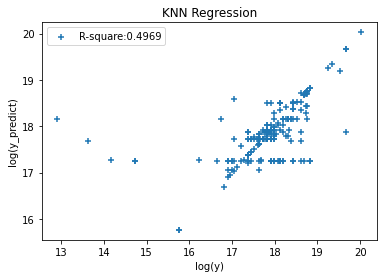

In [524]:
plt.scatter(np.log(ytest), np.log(y_pred), marker = '+', label = 'R-square:{:.4f}'.format(r2))
#plt.plot([min(np.log(y)), max(np.log(y))], [min(np.log(y)), max(np.log(y))], 'r--',linewidth = 3)
plt.ylabel('log(y_predict)')
plt.xlabel('log(y)')
plt.title('KNN Regression')
plt.legend()
plt.show()


In [530]:
y.shape, 

(760, 1)

# MSE vs K cross Validation

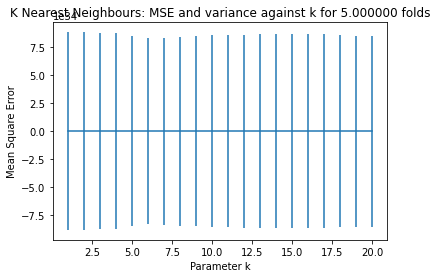

In [532]:
from sklearn.model_selection import KFold
def kfolds(x_train, y_train, folds, model, filename, n_neighbors=2):

    #Check if it is a log model - it uses C, whereas others use alpha as the regularisation parameter
    #Also check for kNN model, as it takes a n_neighbours 
   
    kf = KFold(n_splits = folds)
    if (y_train.ndim > 1):
        y_train = np.ravel(y)
    
    for train, test in kf.split(x_train):

        #print(x_train[train])
        model.fit(x_train[train], y_train[train])
        ypred = model.predict(x_train[test])
        mean_square_er = mean_squared_error(y[test],ypred)

        if (("df" not in locals())):

            df = pd.DataFrame([mean_square_er])
            continue

        df = df.append(pd.DataFrame([mean_square_er]))

    mean = df.mean()
    var = df.iloc[:,0:folds].var()

    #Last two values of the column will be the mean and var

    df = df.append([mean])
    df = df.append([var])
    
     #Write to csv
    df.to_csv(filename + '.csv')

    return [mean, var, folds, n_neighbors]

def crossValK(kRange, model, modelType, filename):

    meansVars = []

    for k in kRange:
        model.n_neighbors = k
        folds = kfolds(X, y, 5,model,"output.csv",k)
        folds.append(k)
        meansVars.append(folds)


    meansVars = np.array(meansVars)
    meansVars = meansVars.transpose()
    pd.DataFrame(meansVars).to_csv(filename + ".csv")


    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(modelType + ": MSE and variance against k for %f"% int(5) + " folds")
    ax.set_ylabel('Mean Square Error')
    ax.set_xlabel('Parameter k')
    ax = plt.errorbar(meansVars[4], meansVars[0], yerr = meansVars[1])
    
    return fig

#kNeigh = KNeighborsRegressor(n_neighbors=2,weights='uniform')
knn=KNeighborsRegressor()
n_neighbors=range(1,21)

fig3 = crossValK(n_neighbors,knn, "K Nearest Neighbours", "Val_K_1")


#From our validation, we'll set k = 11

#kNeigh.n_neighbors = 11

plt.show()



# Polynomial Cross Validation

[0    1.345023e+17
dtype: float64 0    1.335520e+17
dtype: float64
 0    1.335474e+17
dtype: float64 0    1.335404e+17
dtype: float64]


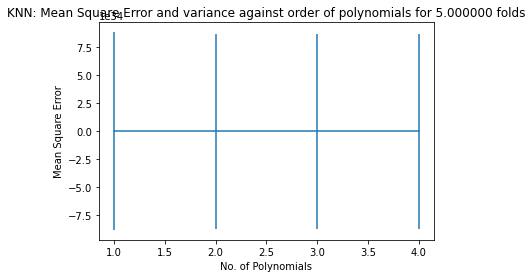

In [531]:
from sklearn.model_selection import KFold
def kfolds(x_train, y_train, folds, model, filename, n_neighbors=2):

    #Check if it is a log model - it uses C, whereas others use alpha as the regularisation parameter
    #Also check for kNN model, as it takes a n_neighbours 


      


    kf = KFold(n_splits = folds)
    if (y_train.ndim > 1):
        y_train = np.ravel(y)
    
    for train, test in kf.split(x_train):

        #print(x_train[train])
        model.fit(x_train[train], y_train[train])
        ypred = model.predict(x_train[test])
        mean_square_er = mean_squared_error(y[test],ypred)

        if (("df" not in locals())):

            df = pd.DataFrame([mean_square_er])
            continue

        df = df.append(pd.DataFrame([mean_square_er]))

    mean = df.mean()
    var = df.iloc[:,0:folds].var()

    #Last two values of the column will be the mean and var

    df = df.append([mean])
    df = df.append([var])
    
     #Write to csv
    df.to_csv(filename + '.csv')

    return [mean, var, folds, n_neighbors]



def crossValpoly(Train_x, Train_y,Orders, model, modelType, filename):

    meansVars = []

    for order in Orders:
        poly = PolynomialFeatures(order)
        X_train_adj = poly.fit_transform(X)
        folds = kfolds(X_train_adj, Train_y, 5,model,"Poly_Folds.csv",0.01)
        folds.append(order)
        meansVars.append(folds)


    meansVars = np.array(meansVars)
    meansVars = meansVars.transpose()
    pd.DataFrame(meansVars).to_csv(filename + ".csv")

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(modelType + ": Mean Square Error and variance against order of polynomials for %f"% int(5) + " folds")
    ax.set_ylabel('Mean Square Error')
    ax.set_xlabel('No. of Polynomials')

    #Plotting order of polynomial against MSE, with variance on the error bar
    
    print(meansVars[0])
    ax = plt.errorbar(meansVars[4], meansVars[0], yerr = meansVars[1])
    
    return fig

X = np.array(X)
y = np.array(y)
crossValpoly(X,y,[1,2,3,4],best_knn,"KNN","output")
plt.show()

# Feature Transform

In [451]:
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
for d in range(1,11):
    poly = PolynomialFeatures(degree=d)
    X_T_poly = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_T_poly, y, random_state = 0)
    knn = KNeighborsRegressor(n_neighbors = 3)
    knn.fit(X_train, y_train)
    scores = cross_val_score(knn, X_test, y_test, scoring='r2', cv=5, n_jobs=-1)
    print(scores.mean())

-2.0679213323552483
-2.16661445804022
-2.1581594077881254
-2.145329733125414
-2.143483420592324
-2.1695840780112783
-2.1939707118115557
-2.193853916752494
-2.193889219654614
-2.334372112223187


# Standard Scaling

In [452]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)



In [453]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xtrain)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [454]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
knn_mses=[]
knn_rmses=[]
for k in range(1,21):
    knnr = KNeighborsRegressor(n_neighbors=k)
    knnr.fit(x_train, y_train)
    y_pred=knnr.predict(x_test)
    mse = mean_squared_error(y_test,y_pred)
    rmse=mse**0.5
    knn_mses.append(mse)
    knn_rmses.append(rmse)
knn_mses, knn_rmses


([9868175147368422.0,
  9512457026973684.0,
  9419813466666668.0,
  9128528102302632.0,
  9072474656526316.0,
  9076723155116960.0,
  9072499228625136.0,
  9120785660444080.0,
  9216004958966862.0,
  9145132309526316.0,
  9080925775054372.0,
  9152230748026612.0,
  1.343493280951442e+16,
  2.3148935065816544e+16,
  2.133504183774288e+16,
  2.003063931159556e+16,
  2.1281917320961716e+16,
  2.018149654931787e+16,
  1.9326807942542764e+16,
  1.834548827699353e+16],
 [99338689.0761521,
  97531825.71332131,
  97055723.51317911,
  95543331.0195046,
  95249538.87828705,
  95271838.20582533,
  95249667.86621955,
  95502804.46376473,
  96000025.82794893,
  95630185.13799039,
  95293891.5936083,
  95667291.94466943,
  115909157.57400025,
  152147740.9159155,
  146065197.21597913,
  141529641.10600847,
  145883231.80188227,
  142061594.20940578,
  139020890.30984792,
  135445517.7441968])

# Cross_val_Predict

In [455]:
from sklearn.model_selection import train_test_split
Xtrain , Xtest, ytrain, ytest = train_test_split(X,y,test_size = 0.2)


Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((608, 5), (152, 5), (608, 1), (152, 1))

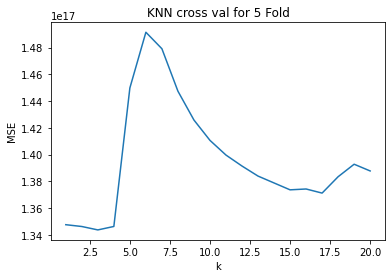

In [456]:
from sklearn.model_selection import cross_val_predict
k=range(1,21)
knn_mses = []
knn_rmses= []
for n in k:
    knn = KNeighborsRegressor(n)
    y_pred = cross_val_predict(knn,X,y)
    mse = mean_squared_error(y,y_pred)
    knn_mses.append(mse)
    knn_rmses.append(mse**0.5)

plt.plot(k, knn_mses)
plt.xlabel("k")
plt.ylabel('MSE')
plt.title('KNN cross val for 5 Fold')
plt.show()

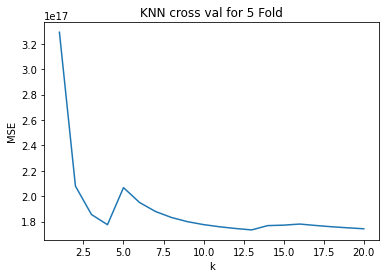

In [457]:
from sklearn.model_selection import cross_val_predict
k=range(1,21)
knn_mses_train = []

for n in k:
    knn = KNeighborsRegressor(n)
    y_pred_train = cross_val_predict(knn,Xtrain,ytrain)
    mse_train = mean_squared_error(ytrain,y_pred_train)
    knn_mses_train.append(mse_train)
    

    
plt.plot(k, knn_mses_train)

plt.xlabel("k")
plt.ylabel('MSE')
plt.title('KNN cross val for 5 Fold')
plt.show()

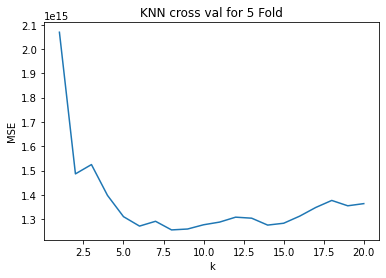

In [458]:
knn_mses_test=[]
for n in k: 
    knn = KNeighborsRegressor(n)
    y_pred_test = cross_val_predict(knn,Xtest,ytest)
    mse_test = mean_squared_error(ytest,y_pred_test)
    knn_mses_test.append(mse_test)
plt.plot(k, knn_mses_test)
plt.xlabel("k")
plt.ylabel('MSE')
plt.title('KNN cross val for 5 Fold')
plt.show()

# KNN Regression with k-fold cross validation

In [459]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
mse=[]
for i in range(1,21):
    knn_reg = KNeighborsRegressor(i)
    scores = cross_val_score(knn_reg, X, y,scoring="neg_mean_squared_error", cv=5)
    mse.append(scores)
    rmse_scores = np.sqrt(-scores)
    print("k ",i, "Mean:\t\t ", rmse_scores.mean(), "Standard Deviation:", rmse_scores.std())
    

k  1 Mean:		  195634018.66524357 Standard Deviation: 310618294.89678866
k  2 Mean:		  193863265.5769662 Standard Deviation: 311509806.78822607
k  3 Mean:		  194181072.70189524 Standard Deviation: 310901990.05280083
k  4 Mean:		  197576665.66380304 Standard Deviation: 309172991.96880424
k  5 Mean:		  233686601.21707195 Standard Deviation: 300612311.7736395
k  6 Mean:		  257132611.73722488 Standard Deviation: 288137959.1611392
k  7 Mean:		  263581772.11866665 Standard Deviation: 280056420.51475173
k  8 Mean:		  252951094.52438205 Standard Deviation: 284167237.1547607
k  9 Mean:		  244829850.93705362 Standard Deviation: 287468457.5213255
k  10 Mean:		  238665119.4304863 Standard Deviation: 289997503.69098854
k  11 Mean:		  233891367.24335074 Standard Deviation: 291985843.44876474
k  12 Mean:		  229687311.48463756 Standard Deviation: 293911637.5693401
k  13 Mean:		  226062906.8326172 Standard Deviation: 295442219.49075174
k  14 Mean:		  223038735.26538834 Standard Deviation: 296867248.5803

# Dummy Regressor

In [173]:
from sklearn.dummy import DummyRegressor
dummyRegress = DummyRegressor(strategy='median')

dummyRegress.fit(X,y)

dummyRegress.predict(X)

dummyRegress.score(X, y)

-0.005348512717114451

In [174]:
from sklearn.dummy import DummyRegressor
dummyRegress = DummyRegressor(strategy='mean')

dummyRegress.fit(X,y)

dummyRegress.predict(X)

dummyRegress.score(X, y)

0.0